[]

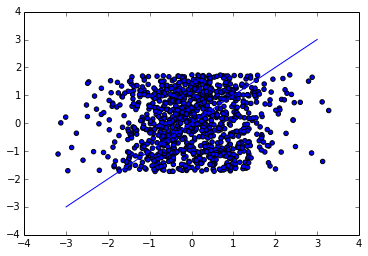

In [38]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

#### generate samples
nnn = 1000
x1 = np.random.normal(0,1,nnn)
x2 = np.random.uniform(-np.power(3,0.5),np.power(3,0.5),nnn)
##x2 = np.random.laplace(0,1,nnn)
x = np.array([x1,x2])

### plot samples

b = np.array([1,1])
b = b/np.linalg.norm(b)
xxx = np.linspace(-3,3,30)
yyy = b[1]/b[0]*xxx
plt.scatter(x[0,:],x[1,:])
plt.plot(xxx,yyy)
plt.plot()

(1000, 2)


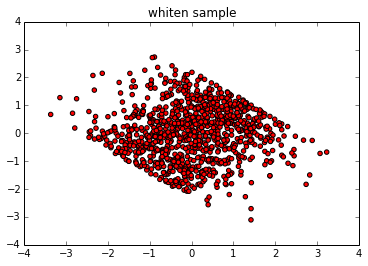

In [45]:
#### gradient method
def whitening(_x):
    _x = _x-np.mean(_x,0)
    U,s,Vt = np.linalg.svd(_x)
    z1 = U[:,0]
    z2 = U[:,1]
    x_white = np.transpose(np.array([s[0]*z1,s[1]*z2]))
    return x_white

y = np.copy(np.transpose(x))
whiten_x = whitening(y)
print whiten_x.shape
##plt.scatter(x[0,:],x[1,:])
plt.scatter(whiten_x[:,0],whiten_x[:,1],c="r")
plt.title("whiten sample")
plt.show()


[]

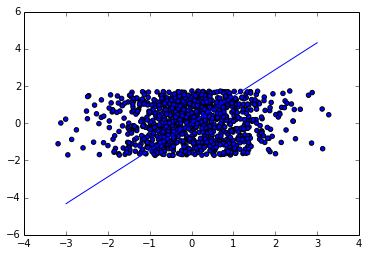

In [42]:
epsilon = 0.01
b = np.array([1,1])
b = b/np.linalg.norm(b)

for i in range(100):
    ccc = np.sum(np.array([ np.power(np.dot(b,i),3)*i for i in whiten_x]),0)*1.0/nnn
    ddd = np.sum(np.array([ np.power(np.dot(b,i),4) for i in whiten_x]))*1.0/nnn-3
    b = b + epsilon*ddd*ccc*2
    b = b/np.linalg.norm(b)
    ####print b

### plot samples
xxx = np.linspace(-3,3,30)
yyy = b[1]/b[0]*xxx
plt.scatter(x[0,:],x[1,:])
plt.plot(xxx,yyy)
plt.plot()

[]

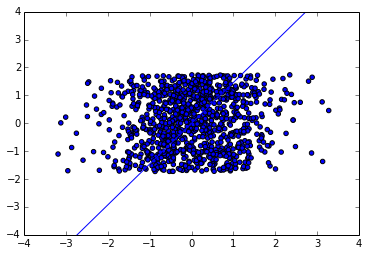

In [43]:
b = np.array([1,1])
b = b/np.linalg.norm(b)

for i in range(100):
    ccc = np.sum(np.array([3*np.power(np.dot(b,i),2)*b for i in whiten_x]),0)*1.0/nnn
    ##print ccc
    ddd =  np.sum(np.array([np.power(np.dot(b,i),3)*i for i in whiten_x]),0)*1.0/nnn
    ###print ddd
    b = ccc-ddd
    b = b/np.linalg.norm(b)
    
### plot samples
xxx = np.linspace(-3,3,30)
yyy = b[1]/b[0]*xxx
plt.scatter(x[0,:],x[1,:])
plt.plot(xxx,yyy)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot() 

[]

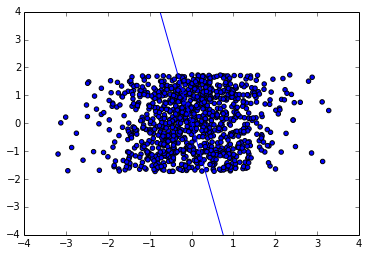

In [44]:
b = np.array([1,1])
b = b/np.linalg.norm(b)

for i in range(100):
    ccc = np.sum(np.array([(1-np.tanh(np.dot(b,i)))*b for i in whiten_x]),0)*1.0/nnn
    ##print ccc
    ddd =  np.sum(np.array([np.tanh(np.dot(b,i))*i for i in whiten_x]),0)*1.0/nnn
    ###print ddd
    b = ccc-ddd
    b = b/np.linalg.norm(b)
    
### plot samples
xxx = np.linspace(-3,3,30)
yyy = b[1]/b[0]*xxx
plt.scatter(x[0,:],x[1,:])
plt.plot(xxx,yyy)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot()    